In [13]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import re
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [15]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Clean Data

In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [17]:
df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))

## Preprocess Data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X = df['comment_text']

In [20]:
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
vectorizer

TfidfVectorizer(max_features=5000, stop_words='english')

In [21]:
# document-term matrix
X_dtm = vectorizer.fit_transform(X)

In [22]:
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import copy

In [40]:
logreg = LogisticRegression(C=12.0)

In [41]:
for label in df[df.columns[2:]]:
    print('Processing {}'.format(label))
    y = df[label]
    model = copy.deepcopy(logreg)
    model.fit(X_dtm, y)
    y_pred_X = model.predict(X_dtm)
    print('Training accuracy: {}'.format(accuracy_score(y, y_pred_X)))
    models[label] = model

Processing toxic


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9639470831166064
Processing severe_toxic


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9920662275726793
Processing obscene


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.983255102744233
Processing threat


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9981199591404453
Processing insult


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9755344016143285
Processing identity_hate
Training accuracy: 0.9939901360522903


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Make Predictions

In [57]:
input_text = vectorizer.transform(['you suck'])

for label, model in models.items():
    predictions = model.predict(input_text)
    print('Predictions for {}: {}'.format(label, predictions[0]))

Predictions for toxic: 1
Predictions for severe_toxic: 0
Predictions for obscene: 1
Predictions for threat: 0
Predictions for insult: 1
Predictions for identity_hate: 0


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [16]:
model = Sequential()

model.add(Embedding(MAX_FEATURES + 1, 32))
model.add(Bidirectional(LSTM(64, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='sigmoid'))

In [17]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6880032   
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [19]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 7444s 1s/step - loss: 0.0666 - val_loss: 0.0435


<Figure size 800x500 with 0 Axes>

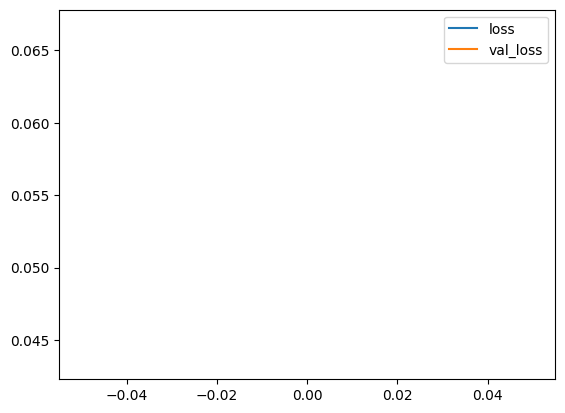

In [20]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### Make Predictions

In [21]:
input_text = vectorizer('you suck')

In [22]:
model.predict(np.array([input_text]))

1/1 [==============================] - 3s 3s/step


array([[0.9960829 , 0.29903275, 0.9526132 , 0.0550642 , 0.807391  ,
        0.12825966]], dtype=float32)

In [23]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

### Evaluate Model

In [24]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 279ms/step


In [27]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8421650528907776, Recall:0.6500145792961121, Accuracy:0.4413239657878876


In [28]:
model.save('toxicity.keras')

In [29]:
model = tf.keras.models.load_model('toxicity.keras')

## Predict with Gradio (for fun)

In [58]:
import gradio as gr

In [59]:
def score_comment(comment):
    vectorized_comment = vectorizer.transform([comment])
    text = ""
    for col, model in models.items():
        prediction = model.predict(vectorized_comment)
        prediction = prediction[0]  
        text += "{}: {}\n".format(col, bool(prediction))
    return text

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
    outputs=gr.outputs.Textbox()
)

interface.launch()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15688\3617995713.py:12: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\ACER\AppData\Local\Temp\ipykernel_15688\3617995713.py:12: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\ACER\AppData\Local\Temp\ipykernel_15688\3617995713.py:12: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
C:\Users\ACER\AppData\Local\Temp\ipykernel_15688\3617995713.py:13: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
